<a href="https://colab.research.google.com/github/dhruvipatel14/twitter_sentiment_analysis_covid19/blob/master/twitter_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment analysis of "Covid-19" tweets from twitter using NLP and classifier algorithm

Mounting google drive so that we can access file from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/config_file.txt'

'/content/drive/My Drive/Colab Notebooks/config_file.txt'


Installing ConfigParse.</br>
ConfigParser is use to read configurations.
Here I'm using it to read information of Twitter and Google API keys,Access tokens,etc.

In [ ]:
!pip install ConfigParser

confif.sections gives information of different sections in config file.
Data in the config file is in key,value pair.

In [ ]:
import configparser
config = configparser.RawConfigParser()
config.read('/content/drive/My Drive/Colab Notebooks/config_file.txt')

print(config.sections())

Tweepy library used to read from twitter.

In [3]:
import os
import tweepy as tw
import pandas as pd
import re
pd.set_option('max_colwidth', 800)
import csv
from time import sleep
from textblob import TextBlob

## Scrapping tweets from twitter

In [ ]:
accesstoken = config.get('twitter','accesstoken')
accesstokensecret = config.get('twitter','accesstokensecret')
apikey = config.get('twitter','apikey')
apisecretkey = config.get('twitter','apisecretkey')

Setting connection to tweeter for accessing API, </br>
Also wait_on_rate_limit = True : wait for 15 min to pull the data if pull request exceed more than 1500.


In [ ]:
authenticate = tw.OAuthHandler(apikey,apisecretkey)
authenticate.set_access_token(accesstoken,accesstokensecret)
api = tw.API(authenticate,wait_on_rate_limit=True)  

In [ ]:
search_word = '#covid19 OR #CoronaVirusUpdates'
date_since = '2020-06-19'

In [ ]:
tweets = tw.Cursor(api.search,
            q=search_word,
            lang="en",
            since='2020-01-06').items(1499)

In [ ]:
# def limit_handled(cursor):
#     while True:
#         try:
#             yield cursor.next()
#         except tw.RateLimitError:
#             time.sleep(15 * 60)

# for tweets in limit_handled(tw.Cursor(api.search,
#             q=search_word,
#             lang="en",
#             since=date_since).items()):
#   tweet_details = [[tweet.created_at, tweet.text,tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [ ]:
tweet_details = [[tweet.created_at, tweet.text,tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [ ]:
df = pd.DataFrame(tweet_details,columns=['date','text','user','location'])
df.tail(20)

,date,text,user,location
1479,2020-06-20 14:46:43,RT @MGilbert: Sir David King from @IndependentSage: “This is the most disastrous handling of any serious challenge to a government for 100…,MaggielizzieS,"Reading, England"
1480,2020-06-20 14:46:43,"RT @YourAnonNews: Yesterday, there were 181,005 new cases of #COVID19 and 5,066 deaths were reported in the past 24 hours. \n\nThis brings th…",Joey_McLeran,
1481,2020-06-20 14:46:42,RT @RANDCorporation: New report: #COVID19 cases in China were likely 37 times higher than reported in January 2020. https://t.co/9w6cYLs8zN,Abbas_Raza1_,karachi
1482,2020-06-20 14:46:42,"RT @the_hindu: #Delhi | Issued in his capacity as Chairperson of the Delhi Disaster Management Authority (DDMA), Mr. Baijal’s order stated…",AnkitYa19982227,"Etawah, India"
1483,2020-06-20 14:46:42,"RT @KrisAnneHall: This is a #FakeNews headline intended to mislead and give false information. \nThe comment of the article, although still…",PattiandZari,West/Southwest U.S.
1484,2020-06-20 14:46:41,"RT @TeluguBulletin: #PawanKalyan’s voice well-heard by #YSJagan \n\n@JanaSenaParty chief @PawanKalyan is the only leader, who demanded #Jagan…",sabavatbalaji1,"Hyderabad, India"
1485,2020-06-20 14:46:41,RT @sonalgoelias: Shared Experience at 65th #SKOCHSummit . \nInitiatives of #GMCBL @gurugaman honoured &amp; conferred as ‘SKOCH Award (Silver C…,jalmindi_badal,
1486,2020-06-20 14:46:40,RT @chngin_the_wrld: Today's #shoutout to #womenInSTEM goes to @MissUkachi for her @JAMA_Current paper on associations Between Built Enviro…,our_science,Iraq
1487,2020-06-20 14:46:40,"RT @friendlysoapltd: INTERNATIONAL DAY OF THE MIDWIFE 2020 In the midst of this pandemic, midwives have risen to this extraordinary challe…",jazzy74,United Kingdom
1488,2020-06-20 14:46:40,"RT @SabinaLamba: All these yrs #AbhinavKashyap never informed d association only now we r hearing. "" FWICE secretary Ashok Dubey. \n#Salman…",ShahidK97652108,


In [ ]:
df3 = pd.DataFrame(tweet_details,columns=['date','text','user','location'])
df3.tail(20)

,date,text,user,location
1479,2020-06-20 14:49:19,"RT @LotusOak2: NIH/ NCI scientist whistleblower Dr Judy Mikovits says NIH Tony Fauci KNOWS vaccines cause autism, transmissible cancers (&amp;…",Calendula2016,Great Journey on Trump Train
1480,2020-06-20 14:49:19,"Banner day. 23 years married, 32 years together. And I cut my husband’s hair for the first time. And successfully! 👍#COVID19 #pandemic",ACSkoczylas,
1481,2020-06-20 14:49:19,"RT @YourAnonNews: Yesterday, there were 181,005 new cases of #COVID19 and 5,066 deaths were reported in the past 24 hours. \n\nThis brings th…",celestial_bean_,Georgia Coast
1482,2020-06-20 14:49:19,"Let's transform the recovery to win #COVID19. Pray for flattening of peak, good health, economic progress &amp; everyth… https://t.co/AquT1v4Ki9",EcoEndeavourers,"Thane, Maharashtra, India"
1483,2020-06-20 14:49:18,Thanks to @AtlasCopcoGroup &amp; the great #EmployeeEngagement of #WaterforAll members organisations @RodaKorset 2geth… https://t.co/HpBLGG6pfK,giomar_nilsson,"Stockholm, Sweden"
1484,2020-06-20 14:49:17,"Great News : Glenmark pharmaceuticals launched the drug, #FABIFLU to treat mild to moderate #COVID19 positive cases… https://t.co/70Ne0yKmAS",TheAakashavaani,USA - Hyderabad
1485,2020-06-20 14:49:17,"The top 100 companies whose value has increased the most during #COVID19 - top 3 are #Amazon, #Microsoft and #Apple… https://t.co/wStWtD3Uya",garrett_geoff,"Philadelphia, PA"
1486,2020-06-20 14:49:16,"RT @MSF_Sea: ""Independent of #COVID19, they are people who are looking to have a better life, a decent life.\n\nRegardless of whether there i…",espoir_foi,
1487,2020-06-20 14:49:16,RT @dnl_stvn: Today @CMOH_Alberta said there is evidence to support that wearing masks in public helps prevent the spread of #covid19 while…,una_faye,Treaty 8 Territory
1488,2020-06-20 14:49:16,"RT @InspiringU2: PANDEMIC DENIAL, BY DON.\n\n'Frustrated’ Dr. Fauci claims lack of ‘leadership’ is partly behind ‘burst’ of new COVID-19 infe…",Johnwin99481254,Where four worlds meet


In [ ]:
new_df = pd.concat([df,df3],axis = 0,copy = False)

In [ ]:
print(new_df.columns)
new_df.reset_index(drop = True)
# new_df.drop(columns = ['index'])

Index(['date', 'text', 'user', 'location'], dtype='object')


,date,text,user,location
0,2020-06-20 14:54:33,"RT @nighealthwatch: Dexamethasaone not approved for treating #COVID19 patients, says @NCDCgov\n\nRead more: https://t.co/2ehqNmLp06 #NHWTop10",TunjiLardner,
1,2020-06-20 14:54:33,RT @daandutoit: Very productive AU @_AfricanUnion EU @EUScienceInnov policy dialogue science technology innovation; 2 continents united #Sc…,animuathiei,
2,2020-06-20 14:54:32,"RT @ANI: 33231 samples tested today, the highest number of #COVID19 tests conducted in a single day in Tamil Nadu. Total 861211 samples hav…",aakashverma2609,India 🇮🇳
3,2020-06-20 14:54:32,RT @revathitweets: Before we get the #Telangana #COVID19 health bulletin here are a few messages that I want to share. Very heart breaking…,Bharg_u,"Hyderabad, India"
4,2020-06-20 14:54:31,RT @WendyMeer11: Btw... What ever happened to Lev and Igor?\n\nAll the while this patriot remains silenced and imprisoned in danger of contra…,BennyDdp,
...,...,...,...,...
2993,2020-06-20 14:49:12,RT @TimesMagazine: New job. New baby. House move. Near-death experience. The worst crisis since the Second World War. Divorce – from his wi…,AlysonChorley,"South East, England"
2994,2020-06-20 14:49:12,"RT @BloodDonorsIn: #Delhi\nNeed #Blood Type : A-positive\nAt : Cygnus Sonia Hospital, Nangloi\nBlood Component : Need Plasma A+ve from #COVID…",theAbhijeetRoy,Daltonganj
2995,2020-06-20 14:49:11,"RT @iran_policy: Iran: Coronavirus Update, Over 53,600 Deaths, June 19, 2020, 6:00 PM CEST\nThe People’s Mojahedin Organization of Iran (PMO…",maryataey,
2996,2020-06-20 14:49:10,RT @itzmylife: Discussing with @ptrmadurai few minutes before #COVID19 bulletin from #tamilnadu PTR emphasized why district wise testing da…,JustinYuvarajJ,"Tamil Nadu, India"


Saving Dataframe to csv file for future use 

In [ ]:
new_df.to_csv("/content/drive/My Drive/Colab Notebooks/tweet_raw.csv")

#Sentiment analysis of tweets 

In [4]:
tweet_raw = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tweet_raw.csv",parse_dates=['date'])
tweet_df = pd.DataFrame(tweet_raw)
tweet_df.head()

,Unnamed: 0,date,text,user,location
0,0,2020-06-20 14:54:33,"RT @nighealthwatch: Dexamethasaone not approved for treating #COVID19 patients, says @NCDCgov\n\nRead more: https://t.co/2ehqNmLp06 #NHWTop10",TunjiLardner,NaN
1,1,2020-06-20 14:54:33,RT @daandutoit: Very productive AU @_AfricanUnion EU @EUScienceInnov policy dialogue science technology innovation; 2 continents united #Sc…,animuathiei,NaN
2,2,2020-06-20 14:54:32,"RT @ANI: 33231 samples tested today, the highest number of #COVID19 tests conducted in a single day in Tamil Nadu. Total 861211 samples hav…",aakashverma2609,India 🇮🇳
3,3,2020-06-20 14:54:32,RT @revathitweets: Before we get the #Telangana #COVID19 health bulletin here are a few messages that I want to share. Very heart breaking…,Bharg_u,"Hyderabad, India"
4,4,2020-06-20 14:54:31,RT @WendyMeer11: Btw... What ever happened to Lev and Igor?\n\nAll the while this patriot remains silenced and imprisoned in danger of contra…,BennyDdp,NaN


In [5]:
tweet_df.drop(columns = ['Unnamed: 0'],inplace=True)  

In [6]:
tweet_df.location.value_counts()

India                             43
Hyderabad, India                  38
India 🇮🇳                          36
United States                     31
Delhi, India                      25
                                  ..
Trying to escape Venezuela's h     1
NC                                 1
Omnipresent, digitally.            1
New York State                     1
Jajpur Odisha,India                1
Name: location, Length: 922, dtype: int64

In [7]:
tweet_df.user.value_counts()

aakashverma2609    36
RajeevS27545206    25
NaattuVarthakal    18
gfernandoamb       12
WBBPHILLYFLY       12
                   ..
gennut              1
benhaygood          1
RCorbynout          1
LRMEENA91383442     1
mohariecopal        1
Name: user, Length: 1782, dtype: int64

### Cleaning raw tweets


In [8]:
import re
def clean_tweet(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text) 
  # text = text.lower()
  return text

In [9]:
tweet_df['text'] = tweet_df['text'].apply(lambda x : clean_tweet(x))

In [10]:
tweet_df.head(5)

,date,text,user,location
0,2020-06-20 14:54:33,"Dexamethasaone not approved for treating #COVID19 patients, says Read more: #NHWTop10",TunjiLardner,NaN
1,2020-06-20 14:54:33,Very productive AU EU policy dialogue science technology innovation; 2 continents united #Sc…,animuathiei,NaN
2,2020-06-20 14:54:32,"33231 samples tested today, the highest number of #COVID19 tests conducted in a single day in Tamil Nadu. Total 861211 samples hav…",aakashverma2609,India 🇮🇳
3,2020-06-20 14:54:32,Before we get the #Telangana #COVID19 health bulletin here are a few messages that I want to share. Very heart breaking…,Bharg_u,"Hyderabad, India"
4,2020-06-20 14:54:31,Btw... What ever happened to Lev and Igor?All the while this patriot remains silenced and imprisoned in danger of contra…,BennyDdp,NaN


Calculating subjectivity and Polarity using textblob


In [11]:
def cal_Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def cal_polarity(text):
  return TextBlob(text).sentiment.polarity

In [12]:
tweet_df['subjectivity'] = tweet_df["text"].apply(lambda x : cal_Subjectivity(x))
tweet_df['polarity'] =  tweet_df["text"].apply(lambda x: cal_polarity(x))

In [13]:
tweet_df.head(10)

,date,text,user,location,subjectivity,polarity
0,2020-06-20 14:54:33,"Dexamethasaone not approved for treating #COVID19 patients, says Read more: #NHWTop10",TunjiLardner,NaN,0.500000,0.500000
1,2020-06-20 14:54:33,Very productive AU EU policy dialogue science technology innovation; 2 continents united #Sc…,animuathiei,NaN,0.300000,0.200000
2,2020-06-20 14:54:32,"33231 samples tested today, the highest number of #COVID19 tests conducted in a single day in Tamil Nadu. Total 861211 samples hav…",aakashverma2609,India 🇮🇳,0.482143,-0.035714
3,2020-06-20 14:54:32,Before we get the #Telangana #COVID19 health bulletin here are a few messages that I want to share. Very heart breaking…,Bharg_u,"Hyderabad, India",0.200000,0.000000
4,2020-06-20 14:54:31,Btw... What ever happened to Lev and Igor?All the while this patriot remains silenced and imprisoned in danger of contra…,BennyDdp,NaN,0.000000,0.000000
5,2020-06-20 14:54:31,Just because our president is no longer seriously addressing this crisis doesn’t mean it’s over. We need a comprehensive te…,Mrsjagray,"Michigan, USA",0.677083,-0.322917
6,2020-06-20 14:54:31,Wearing your face mask whenever you go out can help us avoid a second wave of #COVID19 cases in Pennsylvania. Face m…,daneyelll,NaN,0.000000,0.000000
7,2020-06-20 14:54:31,Under Armour debuts face mask for athletes INSTOCK HERE ==&gt; #coronavirus #mask #covid19…,bitcoinconnect,NaN,0.000000,0.000000
8,2020-06-20 14:54:30,Pakistan's aviation authority has issued a statement announcing the lifting of restrictions on international flight…,Sarzamin_eghbal,Pakistan,0.000000,0.000000
9,2020-06-20 14:54:30,This man is not fit to be our Secretary of State for Health. Dexamethasone should only be used to treat #COVID19 in the hospi…,aarkle,London,0.700000,-0.100000


WordCloud visualization

In [14]:
# word = " ".join([ tweets for tweets in tweet_df['text']])
# word_Cloud = WordCloud(random_state=21, max_font_size=110).generate(word)


# plt.imshow(word_Cloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.show()

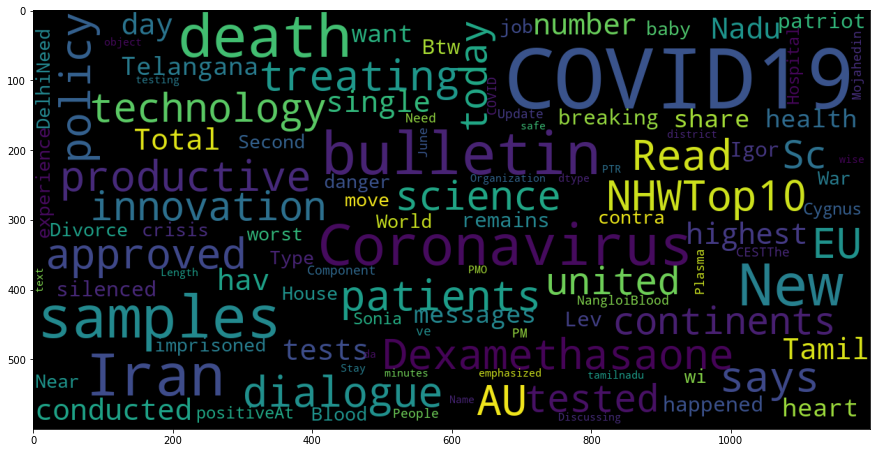

In [16]:
show_wordcloud(tweet_df['text'])

Computing positive(+1), Negative(-1) and Neutral(0) sentiments


In [17]:
def get_sentiments(polarity):
  if polarity < 0:
    return "negative"
  elif polarity == 0:
    return "neutral"
  else:
    return "positive"

In [18]:
tweet_df["sentiment"] = tweet_df["polarity"].apply(get_sentiments)

In [19]:
tweet_df.head(10)

,date,text,user,location,subjectivity,polarity,sentiment
0,2020-06-20 14:54:33,"Dexamethasaone not approved for treating #COVID19 patients, says Read more: #NHWTop10",TunjiLardner,NaN,0.500000,0.500000,positive
1,2020-06-20 14:54:33,Very productive AU EU policy dialogue science technology innovation; 2 continents united #Sc…,animuathiei,NaN,0.300000,0.200000,positive
2,2020-06-20 14:54:32,"33231 samples tested today, the highest number of #COVID19 tests conducted in a single day in Tamil Nadu. Total 861211 samples hav…",aakashverma2609,India 🇮🇳,0.482143,-0.035714,negative
3,2020-06-20 14:54:32,Before we get the #Telangana #COVID19 health bulletin here are a few messages that I want to share. Very heart breaking…,Bharg_u,"Hyderabad, India",0.200000,0.000000,neutral
4,2020-06-20 14:54:31,Btw... What ever happened to Lev and Igor?All the while this patriot remains silenced and imprisoned in danger of contra…,BennyDdp,NaN,0.000000,0.000000,neutral
5,2020-06-20 14:54:31,Just because our president is no longer seriously addressing this crisis doesn’t mean it’s over. We need a comprehensive te…,Mrsjagray,"Michigan, USA",0.677083,-0.322917,negative
6,2020-06-20 14:54:31,Wearing your face mask whenever you go out can help us avoid a second wave of #COVID19 cases in Pennsylvania. Face m…,daneyelll,NaN,0.000000,0.000000,neutral
7,2020-06-20 14:54:31,Under Armour debuts face mask for athletes INSTOCK HERE ==&gt; #coronavirus #mask #covid19…,bitcoinconnect,NaN,0.000000,0.000000,neutral
8,2020-06-20 14:54:30,Pakistan's aviation authority has issued a statement announcing the lifting of restrictions on international flight…,Sarzamin_eghbal,Pakistan,0.000000,0.000000,neutral
9,2020-06-20 14:54:30,This man is not fit to be our Secretary of State for Health. Dexamethasone should only be used to treat #COVID19 in the hospi…,aarkle,London,0.700000,-0.100000,negative


In [20]:
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

# enable_plotly_in_cell
tweet_df['sentiment'].value_counts().iplot(kind = 'bar')

Word cloud of Positive sentiment

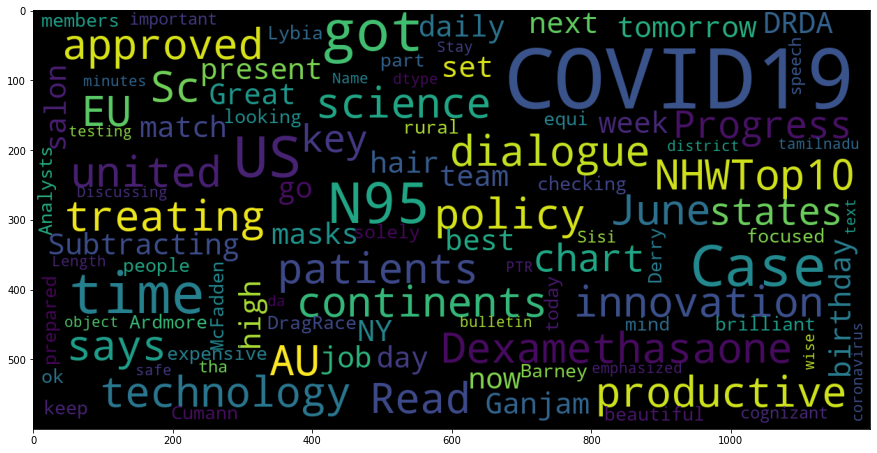

In [21]:
show_wordcloud(tweet_df[tweet_df['sentiment'] == "positive"]['text'])

Word cloud of Negative sentiments

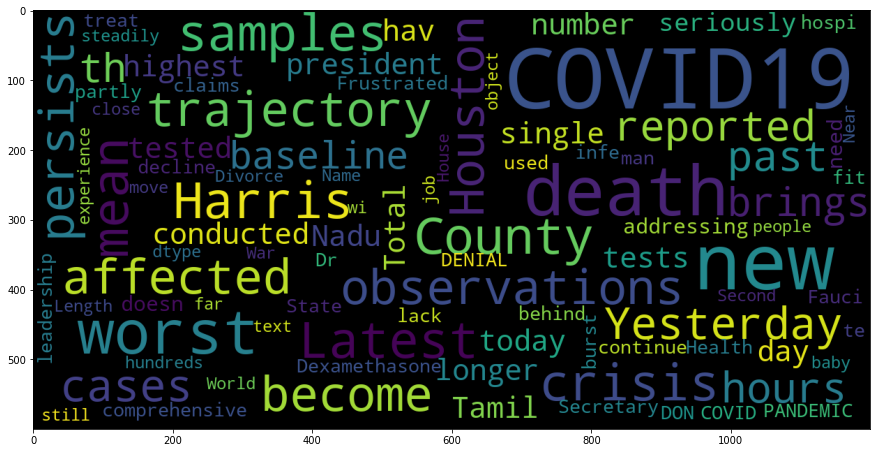

In [22]:
show_wordcloud(tweet_df[tweet_df['sentiment'] == "negative"]['text'])

Removing Stopwords, punctuation,digits, special characters from Tweets

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords 

stopword = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

In [25]:
def tokens(text):
  "List all the word tokens in a text."
  text = re.sub('[0-9]+', '', text)
  ptrn = re.compile('<.*?==>')
  text = re.sub(ptrn, '', text)
  text = text.lower()
  return text

In [26]:
tweet_df['text'] = tweet_df['text'].apply(lambda x : tokens(x))
tweet_df['text']= tweet_df['text'].apply(lambda x : word_tokenize(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : [item for item in x if item not in stopword])
tweet_df.head(10)

,date,text,user,location,subjectivity,polarity,sentiment
0,2020-06-20 14:54:33,"[dexamethasaone, approved, treating, covid, patients, says, read, nhwtop]",TunjiLardner,NaN,0.500000,0.500000,positive
1,2020-06-20 14:54:33,"[productive, au, eu, policy, dialogue, science, technology, innovation, continents, united, sc…]",animuathiei,NaN,0.300000,0.200000,positive
2,2020-06-20 14:54:32,"[samples, tested, today, highest, number, covid, tests, conducted, single, day, tamil, nadu, total, samples, hav…]",aakashverma2609,India 🇮🇳,0.482143,-0.035714,negative
3,2020-06-20 14:54:32,"[get, telangana, covid, health, bulletin, messages, want, share, heart, breaking…]",Bharg_u,"Hyderabad, India",0.200000,0.000000,neutral
4,2020-06-20 14:54:31,"[btw, ..., ever, happened, lev, igor, patriot, remains, silenced, imprisoned, danger, contra…]",BennyDdp,NaN,0.000000,0.000000,neutral
5,2020-06-20 14:54:31,"[president, longer, seriously, addressing, crisis, ’, mean, ’, need, comprehensive, te…]",Mrsjagray,"Michigan, USA",0.677083,-0.322917,negative
6,2020-06-20 14:54:31,"[wearing, face, mask, whenever, go, help, us, avoid, second, wave, covid, cases, pennsylvania, face, m…]",daneyelll,NaN,0.000000,0.000000,neutral
7,2020-06-20 14:54:31,"[armour, debuts, face, mask, athletes, instock, ==, gt, coronavirus, mask, covid…]",bitcoinconnect,NaN,0.000000,0.000000,neutral
8,2020-06-20 14:54:30,"[pakistan, 's, aviation, authority, issued, statement, announcing, lifting, restrictions, international, flight…]",Sarzamin_eghbal,Pakistan,0.000000,0.000000,neutral
9,2020-06-20 14:54:30,"[man, fit, secretary, state, health, dexamethasone, used, treat, covid, hospi…]",aarkle,London,0.700000,-0.100000,negative


Stemming of tweets

In [27]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tweet_df['text'] = tweet_df['text'].apply(lambda x: [stemmer.stem(i) for i in x]) 
tweet_df.head(10)

,date,text,user,location,subjectivity,polarity,sentiment
0,2020-06-20 14:54:33,"[dexamethasaon, approv, treat, covid, patient, say, read, nhwtop]",TunjiLardner,NaN,0.500000,0.500000,positive
1,2020-06-20 14:54:33,"[product, au, eu, polici, dialogu, scienc, technolog, innov, contin, unit, sc…]",animuathiei,NaN,0.300000,0.200000,positive
2,2020-06-20 14:54:32,"[sampl, test, today, highest, number, covid, test, conduct, singl, day, tamil, nadu, total, sampl, hav…]",aakashverma2609,India 🇮🇳,0.482143,-0.035714,negative
3,2020-06-20 14:54:32,"[get, telangana, covid, health, bulletin, messag, want, share, heart, breaking…]",Bharg_u,"Hyderabad, India",0.200000,0.000000,neutral
4,2020-06-20 14:54:31,"[btw, ..., ever, happen, lev, igor, patriot, remain, silenc, imprison, danger, contra…]",BennyDdp,NaN,0.000000,0.000000,neutral
5,2020-06-20 14:54:31,"[presid, longer, serious, address, crisi, ’, mean, ’, need, comprehens, te…]",Mrsjagray,"Michigan, USA",0.677083,-0.322917,negative
6,2020-06-20 14:54:31,"[wear, face, mask, whenev, go, help, us, avoid, second, wave, covid, case, pennsylvania, face, m…]",daneyelll,NaN,0.000000,0.000000,neutral
7,2020-06-20 14:54:31,"[armour, debut, face, mask, athlet, instock, ==, gt, coronaviru, mask, covid…]",bitcoinconnect,NaN,0.000000,0.000000,neutral
8,2020-06-20 14:54:30,"[pakistan, 's, aviat, author, issu, statement, announc, lift, restrict, intern, flight…]",Sarzamin_eghbal,Pakistan,0.000000,0.000000,neutral
9,2020-06-20 14:54:30,"[man, fit, secretari, state, health, dexamethason, use, treat, covid, hospi…]",aarkle,London,0.700000,-0.100000,negative


In [28]:
def list_text(text):
  text = ' '.join(map(str,text))
  return text

In [29]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: list_text(x))
tweet_df['text']

0                                            dexamethasaon approv treat covid patient say read nhwtop
1                                 product au eu polici dialogu scienc technolog innov contin unit sc…
2            sampl test today highest number covid test conduct singl day tamil nadu total sampl hav…
3                               get telangana covid health bulletin messag want share heart breaking…
4                          btw ... ever happen lev igor patriot remain silenc imprison danger contra…
                                                    ...                                              
2993      new job new babi hous move near-death experi worst crisi sinc second world war divorc – wi…
2994    delhine blood type a-positiveat cygnu sonia hospit nangloiblood compon need plasma a+v covid…
2995                     iran coronaviru updat death june pm cestth peopl ’ mojahedin organ iran pmo…
2996                         discuss minut covid bulletin tamilnadu ptr emphas dis

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

Splitting dataset into training and testing datasets

In [31]:
X=tweet_df['text']
Y= tweet_df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 20)

Creating pipeline for </br>
1.Vectorization of tweets using countVectorizer</br>
2.Tranformation using Tf-Idf transformation</br>
3.Training model with MultiNomialNB


In [35]:
pipeline = Pipeline([
                  ('countVectorizer',CountVectorizer()),
                  ('tf-idf',TfidfTransformer()),
                  ('multinomialNB',MultinomialNB()),
])
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('countVectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tf-idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('multinomialNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [36]:
predictions = pipeline.predict(x_test)

print(classification_report(predictions,y_test))
print ('\n')
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.52      1.00      0.68        51
     neutral       0.79      0.88      0.83       206
    positive       0.95      0.76      0.84       343

    accuracy                           0.82       600
   macro avg       0.75      0.88      0.79       600
weighted avg       0.86      0.82      0.83       600



[[ 51   0   0]
 [ 12 181  13]
 [ 36  47 260]]
0.82


##Trained model achieved 82% of accuracy by classifying sentiments of tweets.